In [3]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import msgpack
from dataclasses import asdict, is_dataclass, dataclass

from common import AssetData

In [10]:
a: AssetData = None

a.isin = "hello"

AttributeError: 'NoneType' object has no attribute 'isin'

In [7]:
@dataclass
class Person:
    name: str
    age: int
    city: str

# Create an instance of the dataclass
person_instance = Person(name="Alice", age=30, city="New York")

# Access attributes
print(person_instance.name)  # Output: Alice
print(person_instance.age)   # Output: 30
print(person_instance.city)  # Output: New York

Alice
30
New York


In [2]:
a=yf.download("MSFT",dt.date.today()-dt.timedelta(36500),dt.date.today(),interval='1d')
print(a)

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.059946   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062087   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063158   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061552   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060482   
...                ...         ...         ...         ...         ...   
2024-08-27  412.859985  414.359985  410.250000  413.839996  413.839996   
2024-08-28  414.880005  415.000000  407.309998  410.600006  410.600006   
2024-08-29  414.940002  422.049988  410.600006  413.119995  413.119995   
2024-08-30  415.600006  417.489990  412.130005  417.140015  417.140015   
2024-09-03  417.910004  419.880005  407.029999  409.440002  409.440002   

                Volume  
Date        

In [18]:
ticker="irm"
stock_info = yf.Ticker(ticker)
stockPrice=yf.download(ticker,start=dt.date.today()-pd.to_timedelta("7300d"), end=dt.date.today(),interval='1d')
stockPrice

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-09,19.285275,19.500923,19.223660,19.260628,8.027814,630211
2004-09-10,19.322243,19.661121,19.285275,19.593346,8.166490,355275
2004-09-13,19.654961,19.993839,19.531731,19.907579,8.297464,650012
2004-09-14,19.808996,20.462107,19.753544,20.357363,8.484931,1239485
2004-09-15,20.357363,20.893408,20.227974,20.659273,8.610765,1626733
...,...,...,...,...,...,...
2024-08-27,112.699997,114.930000,112.449997,114.839996,114.839996,1174300
2024-08-28,113.980003,114.699997,111.629997,112.300003,112.300003,1429600
2024-08-29,112.300003,113.400002,111.209999,111.989998,111.989998,1064300


In [4]:
print(stock_info.capital_gains)

Series([], dtype: object)


c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


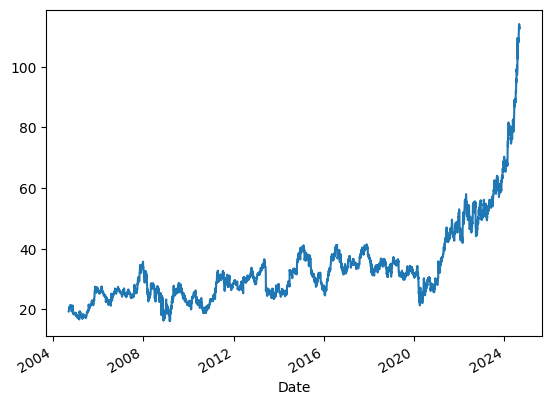

In [5]:
stockPrice["Open"].plot()
plt.show()

In [16]:
stock_hist=stock_info.history(period="max")
hist=stock_hist[["Open", "High", "Low", "Close"]]
div=stock_hist["Stock Splits"]
div

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
1996-02-01 00:00:00-05:00    0.0
1996-02-02 00:00:00-05:00    0.0
1996-02-05 00:00:00-05:00    0.0
1996-02-06 00:00:00-05:00    0.0
1996-02-07 00:00:00-05:00    0.0
                            ... 
2024-08-27 00:00:00-04:00    0.0
2024-08-28 00:00:00-04:00    0.0
2024-08-29 00:00:00-04:00    0.0
2024-08-30 00:00:00-04:00    0.0
2024-09-03 00:00:00-04:00    0.0
Name: Stock Splits, Length: 7195, dtype: float64

In [54]:
stock_hist['Dividends']

Date
1996-02-01 00:00:00-05:00    0.0
1996-02-02 00:00:00-05:00    0.0
1996-02-05 00:00:00-05:00    0.0
1996-02-06 00:00:00-05:00    0.0
1996-02-07 00:00:00-05:00    0.0
                            ... 
2024-08-26 00:00:00-04:00    0.0
2024-08-27 00:00:00-04:00    0.0
2024-08-28 00:00:00-04:00    0.0
2024-08-29 00:00:00-04:00    0.0
2024-08-30 00:00:00-04:00    0.0
Name: Dividends, Length: 7194, dtype: float64

In [17]:
df = stock_info.quarterly_financials
df= df.T
df.index.name = 'Date'
df.index = pd.to_datetime(df.index)
df

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-30,-16629404.0,0.278,521023000.0,-59818000.0,-59818000.0,35783000.0,236744000.0,663728000.0,461205000.0,224461000.0,...,224501000.0,224501000.0,344838000.0,94268000.0,250570000.0,250570000.0,858438000.0,675971000.0,1534409000.0,1534409000.0
2024-03-31,-5767722.0,0.177,503954000.0,-32586000.0,-32586000.0,74061000.0,209555000.0,653255000.0,471368000.0,261813000.0,...,209555000.0,209555000.0,319465000.0,84423000.0,235042000.0,235042000.0,823608000.0,653255000.0,1476863000.0,1476863000.0
2023-12-31,-25840020.307757,0.235999,528759000.0,-109492000.0,-109492000.0,28482000.0,216800000.0,584470000.0,419267000.0,202467000.0,...,199941000.0,199941000.0,314932000.0,91783000.0,223149000.0,223149000.0,818500000.0,601329000.0,1419829000.0,1419829000.0
2023-09-30,-1474312.0,0.098,467905000.0,-15044000.0,-15044000.0,91043000.0,190662000.0,600296000.0,452861000.0,254104000.0,...,198757000.0,198757000.0,315030000.0,89972000.0,225058000.0,225058000.0,795974000.0,592201000.0,1388175000.0,1388175000.0
2023-06-30,-12737970.0,0.21,413695000.0,-60657000.0,-60657000.0,114000.0,203462000.0,584549000.0,353038000.0,149576000.0,...,195367000.0,195367000.0,311805000.0,93840000.0,217965000.0,217965000.0,765292000.0,592644000.0,1357936000.0,1357936000.0
2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
stock_info = yf.Ticker("asddddasd")
a=stock_info.isin
a

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ASDDDDASD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ASDDDDASD&crumb=YpeOL61X7b.


'-'

In [59]:
a={};type(a)

dict

In [20]:
df = stock_info.quarterly_financials
df

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,-16629404.0,-5767722.0,-25840020.307757,-1474312.0,-12737970.0,NaN,NaN
Tax Rate For Calcs,0.278,0.177,0.235999,0.098,0.21,NaN,NaN
Normalized EBITDA,521023000.0,503954000.0,528759000.0,467905000.0,413695000.0,NaN,NaN
Total Unusual Items,-59818000.0,-32586000.0,-109492000.0,-15044000.0,-60657000.0,NaN,NaN
Total Unusual Items Excluding Goodwill,-59818000.0,-32586000.0,-109492000.0,-15044000.0,-60657000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,35783000.0,74061000.0,28482000.0,91043000.0,114000.0,NaN,NaN
Reconciled Depreciation,236744000.0,209555000.0,216800000.0,190662000.0,203462000.0,NaN,NaN
Reconciled Cost Of Revenue,663728000.0,653255000.0,584470000.0,600296000.0,584549000.0,NaN,NaN
EBITDA,461205000.0,471368000.0,419267000.0,452861000.0,353038000.0,NaN,NaN
EBIT,224461000.0,261813000.0,202467000.0,254104000.0,149576000.0,NaN,NaN
